In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut, KFold, StratifiedKFold, GroupKFold

## OLS
* Objective:Sum of Square Residuals
\begin{equation}
S S R=\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2
\end{equation}

### Sampling distribution of the slope from OLS estimators 

\begin{equation}
\hat{\beta}_1=\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}
\end{equation}
Substituting $y_i=\beta_0+\beta_1 x_i+\epsilon_i$ into the equation, and simplifying using the assumption that the mean of $\epsilon_i$ is 0 , we get:
    * If the error terms $\epsilon_i$ are normally distributed, the numerator of the expression for $\hat{\beta}_1$ is also normally distributed as a linear combination of normally distributed variables. The denominator is a constant (not random) for the given sample, so $\hat{\beta}_1$ is a scaled version of a normally distributed variable, which is itself normally distributed.
\begin{equation}
\hat{\beta}_1=\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right) \epsilon_i}{\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}
\end{equation}
The Central Limit Theorem (CLT) can be invoked to justify the normality of the sampling distribution of $\hat{\beta}_1$ because $\hat{\beta}_1$ can be seen as a weighted sum (or average) of the random variables (the error terms, through their influence on $y_i$ ).


## Regression Metrics

* MSE, RMSE
$$\underbrace{E_{\mathbf{x}, y, D}\left[\left(h_D(\mathbf{x})-y\right)^2\right]}_{\text {Expected Tet Error }}=\underbrace{E_{\mathbf{x} \cdot D}\left[\left(h_D(\mathbf{x})-\bar{h}(\mathbf{x})\right)^2\right]}_{\text {Variance }}+\underbrace{E_{\mathbf{x}, y}\left[(\bar{y}(\mathbf{x})-y)^2\right]}_{\text {Noise }}+\underbrace{E_{\mathbf{x}}\left[(\bar{h}(\mathbf{x})-\bar{y}(\mathbf{x}))^2\right]}_{\text {Bias }}$$

* MAE
* [Coefficient of determination](https://online.stat.psu.edu/stat462/node/95/) $R^2$

## Ordinary Least Square (OLS) for Linear Regression
Univariate case

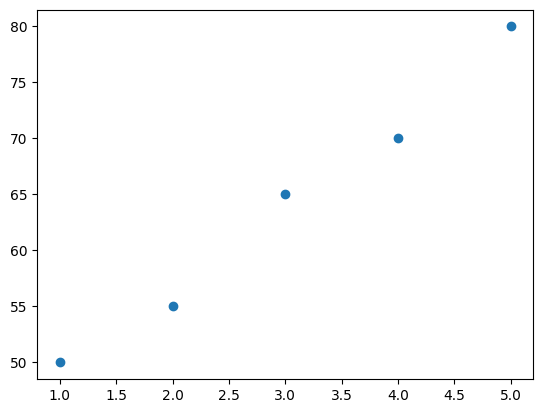

In [9]:
x = np.array([1, 2, 3, 4, 5])  # Hours Studied
y = np.array([50, 55, 65, 70, 80])  # Exam Score
# Create a scatter plot of the data points
plt.scatter(x, y)


Does the formula look similar to covariance?

$$
\mathbf{w}=\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{
\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}
$$


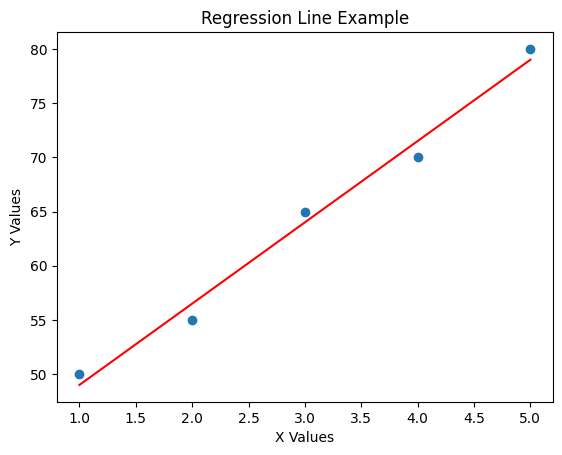

In [17]:
import numpy as np
from my_ml_package.regression import ols_estimate
from my_ml_package.visualize import plot_regression_line

# Data
x = np.array([1, 2, 3, 4, 5])  # Hours Studied
y = np.array([50, 55, 65, 70, 80])  # Exam Score

intercept, slope = ols_estimate(x, y)
plot_regression_line(slope, intercept, x, y)

## Multivariate Linear Regression

In [168]:
df = pd.read_csv("data/house-prices/train.csv")
df = df[ ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'SalePrice']] # Above grade (ground) living area square feet
df = df.dropna()
y_true = df['SalePrice'].to_numpy()
X = df[['GrLivArea', 'TotalBsmtSF', 'LotArea']].to_numpy()


$$
\mathbf{w}=\left(\mathbf{X}^T(\mathbf{X}-\overline{\mathbf{X}})\right)^{-1} \mathbf{X}^T(\mathbf{y}-\overline{\mathbf{y}})
$$

In [169]:
# Calculate the slope using the closed-form formula
X_mean = np.mean(X, axis=0)
y_mean = np.mean(y_true)
numerator = np.dot(X.T, y_true - y_mean)
denominator = np.dot(X.T, X - X_mean)
slope = np.dot(np.linalg.inv(denominator), numerator)
print(slope)


[81.09962868 65.59032341  0.22461289]
[81.09962868 65.59032341  0.22461289]


**Can we use coefficients to evaluate the model?**
* [Feature Selection via Rescaled Linear Regressio](https://www.ijcai.org/proceedings/2017/0211.pdf)

In [170]:
####
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
###
my_model = LinearRegression()
my_model.fit(X, y_true)
# print (my_model.intercept_)
feature_cols = ['GrLivArea', 'TotalBsmtSF', 'LotArea']
for feat, coef  in zip(feature_cols, my_model.coef_):
    print(feat, coef)

    


GrLivArea 430476.8290482909
TotalBsmtSF 400756.8760479456
LotArea 48054.80544450978


See [More](https://www.quora.com/In-a-linear-regression-model-is-it-necessary-to-normalize-my-predictors-if-they-are-of-different-scales-some-are-percentages-while-others-are-continuous-variables-If-yes-how-do-I-interpret-the-results-after-the) for normalization in a linear regression model.

## Hyperparameter Tuning
Methods for Data Split
* Subsampling

* Corss Validation
    + KFold, GroupKFold
    + [Visualizing cross-validation behavior in scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html)
    + [Caveats of Cross-validation](https://www.bing.com/search?q=7+cross+validation+mistaks&cvid=de14ffd0df5042cc883c14bea38f3da1&aqs=edge..69i57j0j69i11004.12424j0j4&FORM=ANAB01&PC=NSJS)
    
* [Grid Search](https://scikit-learn.org/stable/modules/grid_search.html)

Train/test split by  `train_test_split`:
* By default, `train_test_split` splits the data into 75% training data and 25% test data which is a good rule of thumb.
* `stratify=y` makes sure that the labels to be distributed in train and test sets as they are in the original dataset.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)

my_model = LinearRegression()
my_model.fit(X_train, y_train)
ypredicts = my_model.predict(X_test)
print(mean_squared_error(y_test, ypredicts))

104.91568499819532
104.91568499819532


In [174]:

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# kf = KFold(n_splits=2)
# print(list(kf.split(X)))

# gkf = GroupKFold(n_splits=2)
# print(list(gkf.split(X, groups=[0, 1, 0, 1])))

loo = LeaveOneOut()
print(list(loo.split(X)))


[(array([1, 2, 3]), array([0])), (array([0, 2, 3]), array([1])), (array([0, 1, 3]), array([2])), (array([0, 1, 2]), array([3]))]


Beyond regression
* Stratified subsampling
* StratifiedKFold Cross Validation

In [ ]:

# skf = StratifiedKFold(n_splits=2)
# y = np.array([1, 1, 2, 2])
# print(list(skf.split(X, y=y)))